In [21]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay

In [22]:
train_test = Path("iadh_out/ath_bol_aar/train_test.tsv")
train_test_sim = Path("iadh_out/ath_bol_aar/train_test_sim.tsv")
train_test_sim_row = Path("iadh_out/ath_bol_aar/train_test_sim_row.tsv")

In [23]:
df = pd.read_csv(train_test_sim_row, sep="\t", header=0, index_col=0)

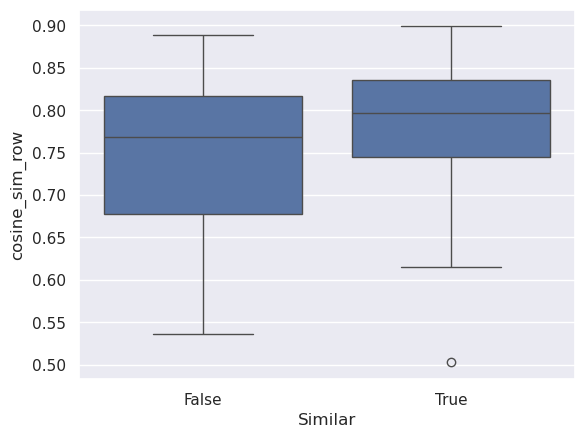

In [24]:
sns.boxplot(data=df, y="cosine_sim_row", x="Similar")
plt.show()

[       inf 0.9373393  0.93430084 0.92108685 0.9144984  0.9011986
 0.899709   0.8942297  0.89172345 0.89055014 0.8900146  0.88699996
 0.88519233 0.8791228  0.8760283  0.874556   0.8741298  0.87107605
 0.8701792  0.8700967  0.8688949  0.8685119  0.8663751  0.8623911
 0.8608028  0.85832405 0.85116214 0.84568435 0.84513766 0.8430188
 0.8348683  0.82321775 0.820265   0.81646013 0.81479543 0.81394076
 0.81069976 0.8046524  0.8037607  0.80181336 0.79686606 0.7922421
 0.7890967  0.7790637  0.77881163 0.77714044 0.75628096 0.75056934
 0.70539016 0.7040132  0.70135075 0.6994691  0.69705397 0.69542885
 0.6798983  0.6539763  0.57102543 0.54027945]


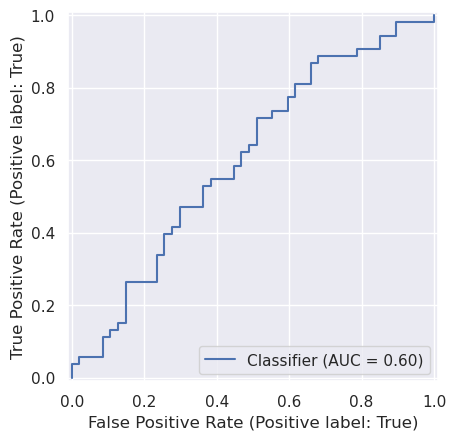

In [25]:
# fpr, tpr, treshold = roc_curve(df["Similar"].tolist(), df["cosine_sim"].tolist())

print(treshold)
RocCurveDisplay.from_predictions(df["Similar"].tolist(), df["cosine_sim_row"].tolist(), pos_label=True)






# Old code


In [81]:
print(df.shape)
print(df.value_counts(subset=["len_profile_x", "len_profile_y"]).reset_index())
df.sort_index(inplace=True)
df.head()

(710, 8)
    len_profile_x  len_profile_y  count
0               3              3     81
1               4              5     56
2               3              4     53
3               4              4     43
4               3              5     39
5               4              3     39
6               3              6     32
7               5              4     31
8               5              5     31
9               4              7     27
10              6              6     26
11              7              5     26
12              6              5     24
13              4              6     23
14              6              7     22
15              5              6     22
16              7              6     21
17              5              3     20
18              3              7     18
19              6              4     18
20              5              7     14
21              7              4     14
22              6              3     12
23              7              

,genome_x,chr_x,len_profile_x,genome_y,chr_y,len_profile_y,seq_x,seq_y
3498,aar,sc-37,6,bol,C7,7,TATGGTACACTGTGTTCATCTACTTTGGAGAGAAGACCAAAGTATG...,CACTCTTCAGCTGCTTCCTTGGAGAGAAGACCGAAGAAAGGATTAG...
3500,aar,LG-1,7,bol,C5,7,TAATTCTGTTGCCTACCTCGTCCACGGCCAAACCTTCCTCTACCTC...,CATCCAGACTGTTGCCGCCCACGACCTCGTCCACGTCCACGTCCAA...
4048,aar,sc-652,5,bol,C3,5,TCGGAGGTTTCGCTACCAAATCGTATTCTCCGGGATCAAGACTCGC...,CACTTCCAGAGTTCTTCCATGGGGAATCTTCCACGTTCAAGAGCAG...
4049,aar,sc-167,5,bol,C9,5,CACCAATAATCTCCACAAGAACATGACCCATTTCTAAAATGATGAA...,TGGCTTTAGCTTCTTTGTTCGCTCGCTCTCGTAGAACAGCTTCCTC...
4050,aar,sc-167,5,ath,Chr5,5,CACCAATAATCTCCACAAGAACATGACCCATTTCTAAAATGATGAA...,CACCAATAATCTCTGCAGGAACATACTCCATTTCTAAAATGATGAA...


In [ ]:
df_c = df.copy() 
df_c['original_index'] = df_c.index

grouped = df_c.groupby(['len_profile_x', 'len_profile_y'])
shuffled_parts = []

for what, group in grouped:
    # makes sure group is not to small to shuffel
    if len(group) == 1:
        shuffled_parts.append(group)
        print("Error group to small !")
        continue
    
    shuffled_group = group.copy()
    same = True
    # shuffel everything till there are no same combinations as before
    while same:
        shuffled_values = shuffled_group[["genome_y", "chr_y", "len_profile_y", "seq_y"]].sample(frac=1, random_state=None).reset_index(drop=True)
        shuffled_group[["genome_y", "chr_y", "len_profile_y", "seq_y"]] = shuffled_values[["genome_y", "chr_y", "len_profile_y", "seq_y"]].values
        
        if shuffled_group[shuffled_group["seq_y"] == group["seq_y"]]["seq_y"].notna().sum() == 0:
            same = False 

    shuffled_parts.append(shuffled_group)

shuffled_df = pd.concat(shuffled_parts).sort_values("original_index").drop(columns="original_index")
# Check if there are not similar sequences at all
df[df[["seq_y"]] == shuffled_df[["seq_y"]]]["seq_y"].notna().sum()

# write to csv 
# profit

False    603
Name: count, dtype: int64